### Project: Fuzzy Logic for Traffic Light Control
This project uses fuzzy logic to manage traffic lights at a two-road intersection. Traffic density on each road is used as input to determine the green light duration for each road.

- **Inputs**: Traffic density of Road 1 and Road 2 (categorized as low, medium, or high).
- **Output**: Green light duration (categorized as short, medium, or long).
- **Objective**: Improve traffic flow efficiency and reduce congestion using intelligent decision-making.


**Designing a fuzzy system to control traffic light duration based on traffic density.**

In [2]:
#importing the necessry libraries
!pip install scikit-fuzzy
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.5 MB/s eta 0:00:00


Defining the Fuzzy variables
Input variables:

traffic_density_road1: Range from 0 to 100 vehicles (low, medium, high).
traffic_density_road2: Range from 0 to 100 vehicles (low, medium, high

In [60]:
traffic_density_road1=ctrl.Antecedent(np.arange(0,101,1),'traffic_density_road1')
traffic_density_road2=ctrl.Antecedent(np.arange(9,101,1),'traffic_density_road2')


Lets define our output, i.e green_light_duration in range 0 to 120 seconds



In [61]:
green_light_duration=ctrl.Consequent(np.arange(0,121,1),'green_light_duration')

Defining the membership function
lets divide road density into low,medium and high
Green light duration into short,medium and long


In [62]:
traffic_density_road1['low']=fuzz.trapmf(traffic_density_road1.universe,[0,0,20,30])
traffic_density_road1['medium']=fuzz.trapmf(traffic_density_road1.universe,[20,30,60,70])
traffic_density_road1['high']=fuzz.trapmf(traffic_density_road1.universe,[70,80,100,100])


traffic_density_road2['low']=fuzz.trapmf(traffic_density_road2.universe,[0,0,20,30])
traffic_density_road2['medium']=fuzz.trapmf(traffic_density_road2.universe,[20,30,60,70])
traffic_density_road2['high']=fuzz.trapmf(traffic_density_road2.universe,[70,80,100,100])



green_light_duration['short']=fuzz.trapmf(green_light_duration.universe,[0,0,20,30])
green_light_duration['medium']=fuzz.trapmf(green_light_duration.universe,[20,30,60,70])
green_light_duration['long']=fuzz.trapmf(green_light_duration.universe,[60,70,110,120])

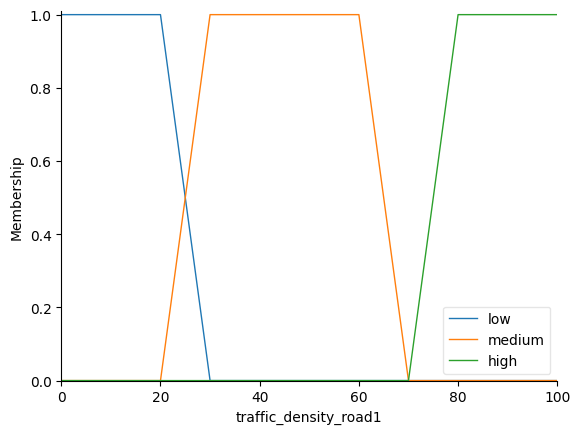

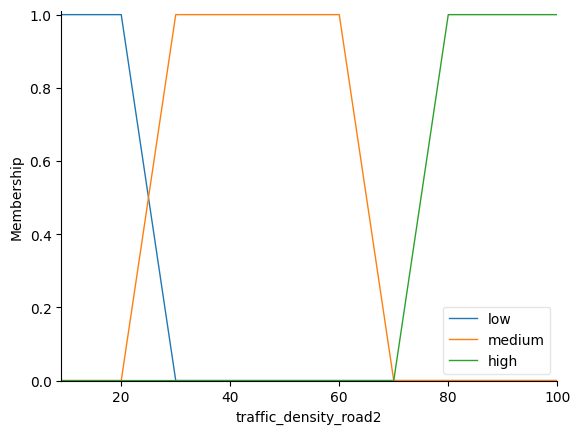

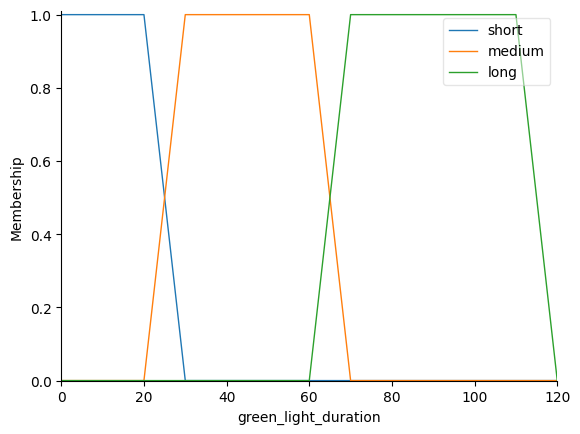

In [63]:
# Plot membership functions for traffic density
traffic_density_road1.view()
traffic_density_road2.view()

# Plot membership function for green light duration
green_light_duration.view()


Lets define the fuzzy  rules:
If traffic density on road1 is high and road2 is low, give a longer green light to road1.
If traffic density on both roads is medium, give an equal duration.
If traffic density on road2 is high and road1 is low, give a longer green light to road2

In [64]:
rule1=ctrl.Rule(traffic_density_road1['high']&traffic_density_road2['low'],green_light_duration['long'])
rule2=ctrl.Rule(traffic_density_road1['medium']&traffic_density_road2['medium'],green_light_duration['medium'])
rule3=ctrl.Rule(traffic_density_road1['low']&traffic_density_road2['high'],green_light_duration['short'])

### Real-World Applications
This system can be implemented at busy intersections to dynamically control traffic lights. By adapting to real-time traffic conditions, it can:
- Reduce waiting times and congestion.
- Save energy by optimizing traffic light durations.
- Scale to larger intersections with minor adjustments.


Now lets create a control system

In [65]:
Traffic_light_control=ctrl.ControlSystem([rule1,rule2,rule3])


In [66]:
Traffic_light_sim=ctrl.ControlSystemSimulation(Traffic_light_control)

Green light duration: 89.99999999999996


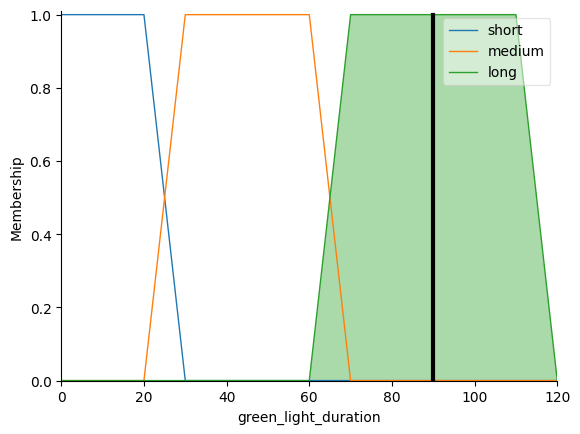

In [41]:
# Test Case 1: High traffic on Road 1, Low traffic on Road 2
Traffic_light_sim.input['traffic_density_road1'] = 80  # High
Traffic_light_sim.input['traffic_density_road2'] = 20  # Low
Traffic_light_sim.compute()
print(f"Green light duration: {Traffic_light_sim.output['green_light_duration']}")

green_light_duration.view(sim=Traffic_light_sim)
plt.show()


Green light duration on road 1: 12.666666666666663


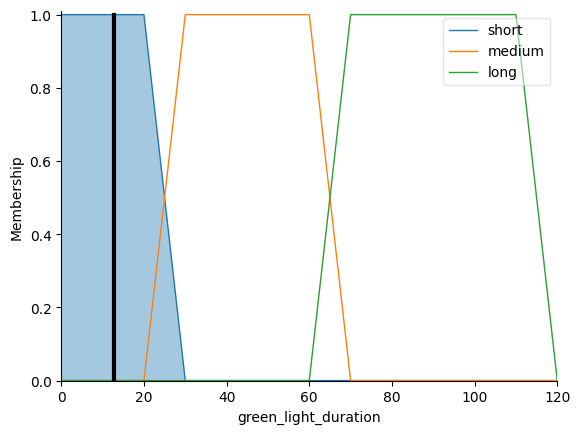

In [67]:
#Test case 2: Low traffic on Road 1, High traffic on Road 2
Traffic_light_sim.input['traffic_density_road1']=10  #low
Traffic_light_sim.input['traffic_density_road2']=80   #high


Traffic_light_sim.compute()

print(f"Green light duration on road 1: {Traffic_light_sim.output['green_light_duration']}")

green_light_duration.view(sim=Traffic_light_sim)
plt.show()

### Conclusion
This fuzzy system effectively controls traffic light durations based on traffic density, showcasing the potential of fuzzy logic for intelligent traffic management. Future enhancements may include:
- Incorporating additional factors like pedestrian crossings.
- Extending the system to multi-road intersections.
- Integrating real-time data using sensors or cameras.

Your thoughts and feedback are welcome!
